# DS ML Project - Financial Inclusion in Africa

## Load and Inspect the Data

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [88]:
# Load the dataset
df = pd.read_csv('data/Train.csv')

In [89]:
df.shape

(23524, 13)

In [90]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [92]:
df.describe(include='all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [93]:
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [94]:
# check for zero values
zero_count = (df == 0).sum()

print(zero_count)

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [95]:
# check for unique values in each column
unique_vals = {column: df[column].unique() for column in df.columns}
for column, unique_vals in unique_vals.items():
    print(f"Unique values in column {column}: {unique_vals}")

Unique values in column country: ['Kenya' 'Rwanda' 'Tanzania' 'Uganda']
Unique values in column year: [2018 2016 2017]
Unique values in column uniqueid: ['uniqueid_1' 'uniqueid_2' 'uniqueid_3' ... 'uniqueid_8757'
 'uniqueid_8758' 'uniqueid_8759']
Unique values in column bank_account: ['Yes' 'No']
Unique values in column location_type: ['Rural' 'Urban']
Unique values in column cellphone_access: ['Yes' 'No']
Unique values in column household_size: [ 3  5  8  7  1  6  4 10  2 11  9 12 16 15 13 14 21 18 17 20]
Unique values in column age_of_respondent: [ 24  70  26  34  32  42  54  76  40  69  64  31  38  47  27  48  25  21
  18  22  58  55  62  29  35  45  67  19  80  66  50  33  28  51  16  17
  30  37  59  65  46  56  52  23  43  49  44  72  53  63  39  81  78  36
  20  60  95  71  57  85  68  41  61  75  86  73  93  74  88  90  77  84
  82  89  79  83  94  87  92  91  98  97  96  99 100]
Unique values in column gender_of_respondent: ['Female' 'Male']
Unique values in column relationshi

In [96]:
df.uniqueid.value_counts()

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_7318    1
uniqueid_7317    1
uniqueid_7316    1
uniqueid_7315    1
uniqueid_8759    1
Name: count, Length: 8735, dtype: int64

We have +23k rows but only 8759 unique IDs, which means some people have multiple accounts. Other than removing the duplicate rows, there shouldn't be need for extra cleaning.

## Trying to Deal with the Duplicates (uniqueid)

In [97]:
# removing duplicates 
df_no_dup = df.drop_duplicates()

In [98]:
print(df.uniqueid.value_counts().head(3000))

uniqueid
uniqueid_1       4
uniqueid_1413    4
uniqueid_1411    4
uniqueid_1410    4
uniqueid_1409    4
                ..
uniqueid_4392    3
uniqueid_4393    3
uniqueid_4365    3
uniqueid_4363    3
uniqueid_4395    3
Name: count, Length: 3000, dtype: int64


In [99]:
uniqueidval = 'uniqueid_4393'
rows_with_uniqueid = df[df['uniqueid'] == uniqueidval]

rows_with_uniqueid.head(100)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
4392,Kenya,2018,uniqueid_4393,No,Rural,No,14,23,Male,Child,Single/Never Married,Secondary education,Remittance Dependent
10460,Rwanda,2016,uniqueid_4393,No,Rural,Yes,3,76,Female,Spouse,Married/Living together,No formal education,Remittance Dependent
19195,Tanzania,2017,uniqueid_4393,No,Urban,Yes,2,45,Female,Spouse,Single/Never Married,Primary education,Self employed


(bold guess but) I think re-indexing the data and ignoring the old uniqueid should work

In [100]:
# create new unique index 
df['global_id'] = range(1, len(df) + 1)

In [101]:
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,global_id
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,2
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,3
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,4
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,5


In [102]:
# drop the old uniqueid column
df.drop('uniqueid', axis=1, inplace=True)

In [103]:
df.head(10)

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,global_id
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,1
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,2
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,3
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,4
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,5
5,Kenya,2018,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed,6
6,Kenya,2018,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed,7
7,Kenya,2018,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government,8
8,Kenya,2018,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing,9
9,Kenya,2018,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent,10


In [104]:
df.global_id.value_counts()

global_id
1        1
15691    1
15689    1
15688    1
15687    1
        ..
7840     1
7839     1
7838     1
7837     1
23524    1
Name: count, Length: 23524, dtype: int64

Now I convert bank_account column to represent numerical values

1: Yes

0: No

In [105]:
df.bank_account = df.bank_account.apply(lambda x: 1 if x == 'Yes' else 0)

In [106]:
df_num = df[['global_id','age_of_respondent', 'household_size', 'bank_account']]

In [107]:
df_num.head()

,global_id,age_of_respondent,household_size,bank_account
0,1,24,3,1
1,2,70,5,0
2,3,26,5,1
3,4,34,5,0
4,5,26,8,0


### Some visualizations

Gender vs. Bank Account Ownership

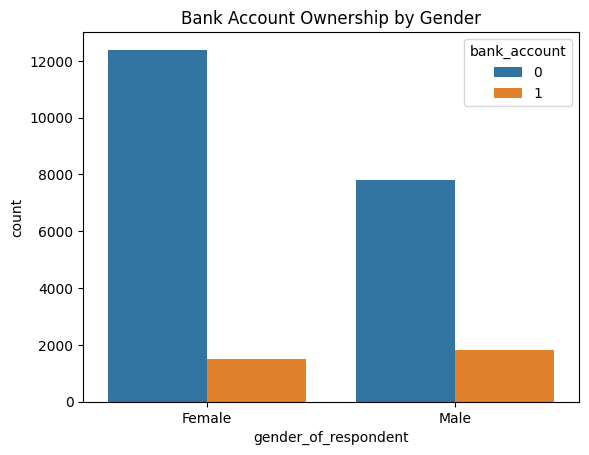

In [108]:
sns.countplot(data= df, x='gender_of_respondent', hue='bank_account')
plt.title('Bank Account Ownership by Gender')
plt.show()

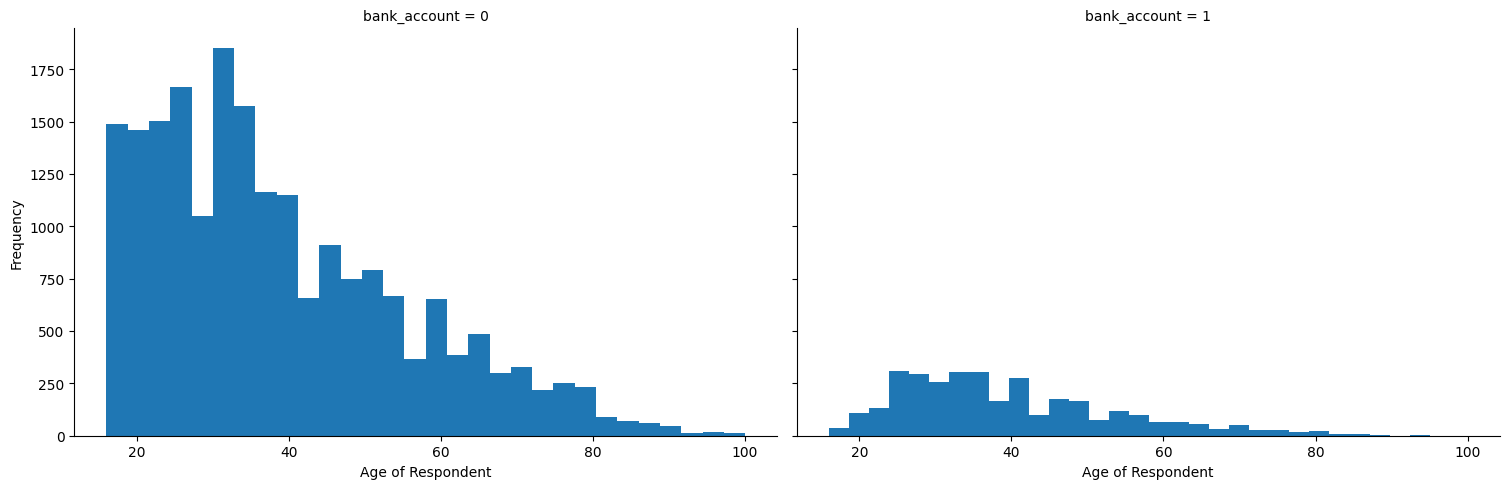

In [109]:
# Histogram of age with respect to bank account ownership
g = sns.FacetGrid(df, col='bank_account', height=5, aspect=1.5)
g.map(plt.hist, 'age_of_respondent', bins=30)
g.set_axis_labels('Age of Respondent', 'Frequency')
plt.show()


In [110]:
# Calculate mean household size by bank account ownership
household_size_stats = df.groupby('bank_account')['household_size'].mean().reset_index()
print(household_size_stats)


   bank_account  household_size
0             0        3.823026
1             1        3.641606


In [111]:
# Cross-tabulation of location type and bank account ownership
location_cross_tab = pd.crosstab(df['location_type'], df['bank_account'], normalize='index')
print(location_cross_tab)


bank_account          0         1
location_type                    
Rural          0.883497  0.116503
Urban          0.821261  0.178739


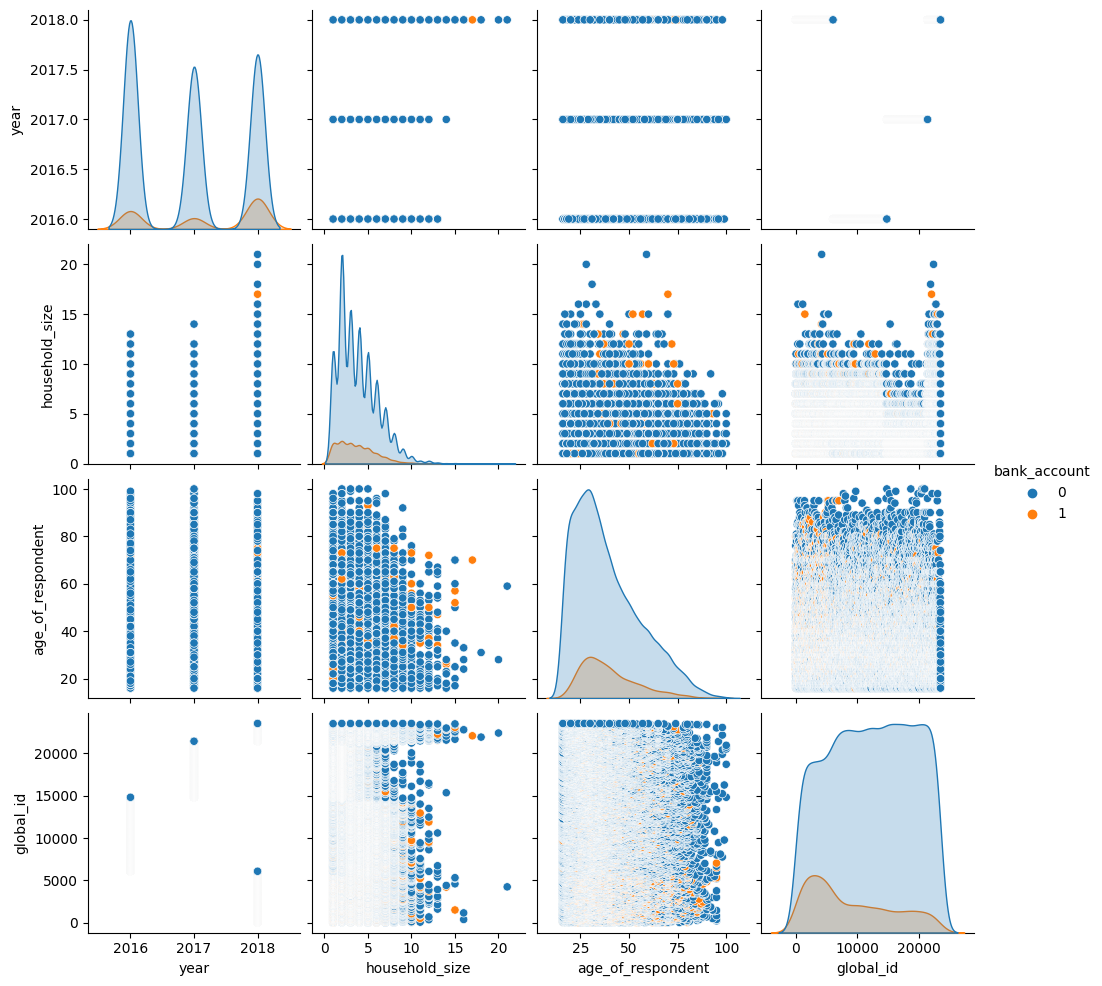

In [112]:
# Pairplot of numerical variables
sns.pairplot(df, hue='bank_account')
plt.show()

Since we have a lot of categorical features, we see a lot of dots in lines, instead of a spread.

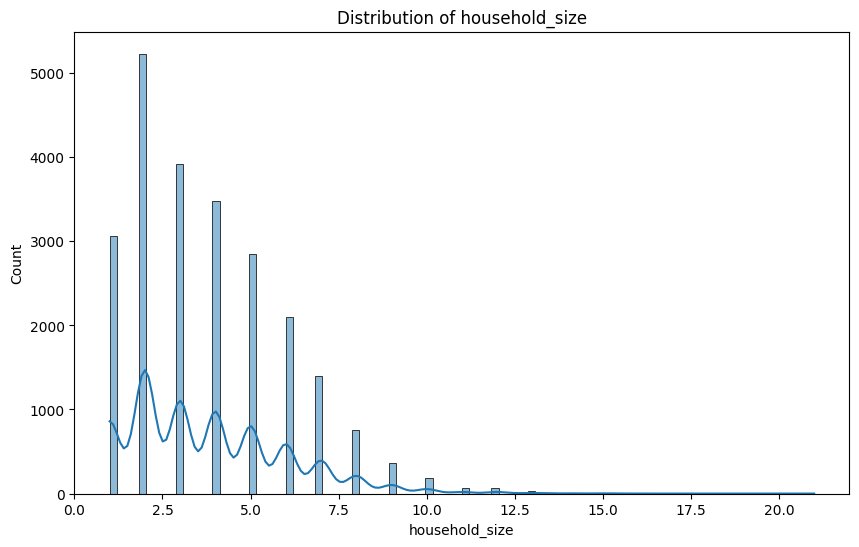

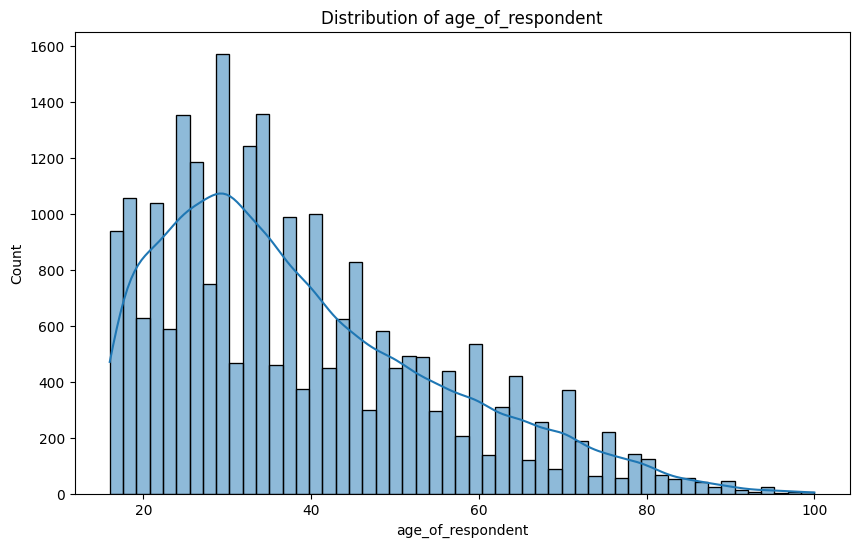

In [113]:
# overview of numerical feature distribution
for column in ['household_size', 'age_of_respondent']:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

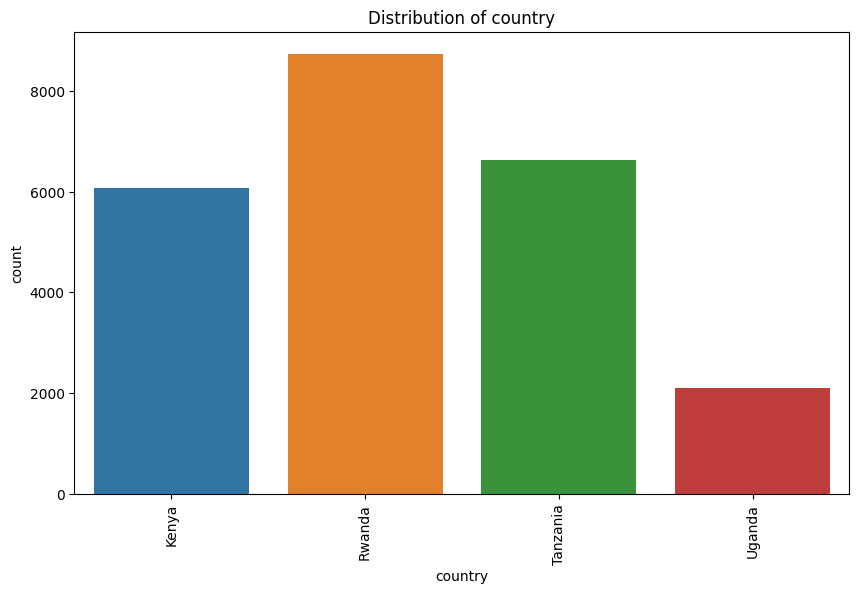

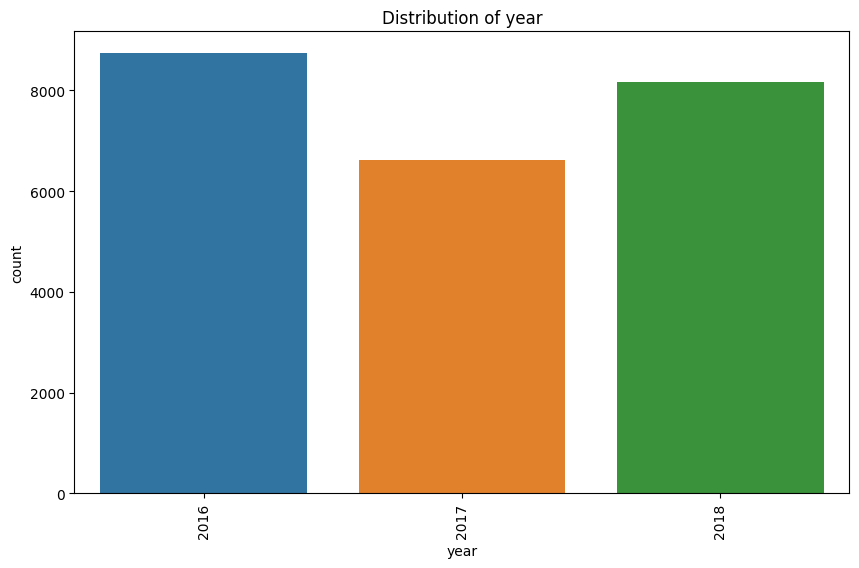

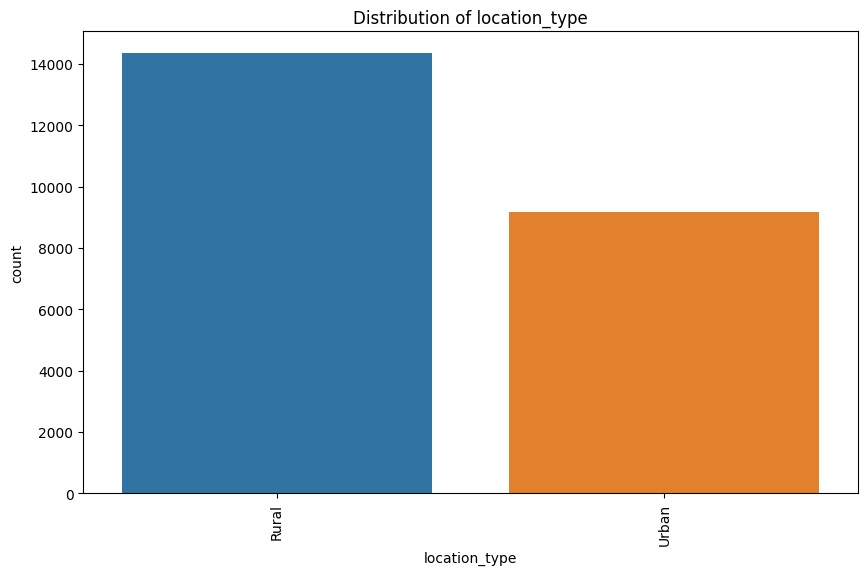

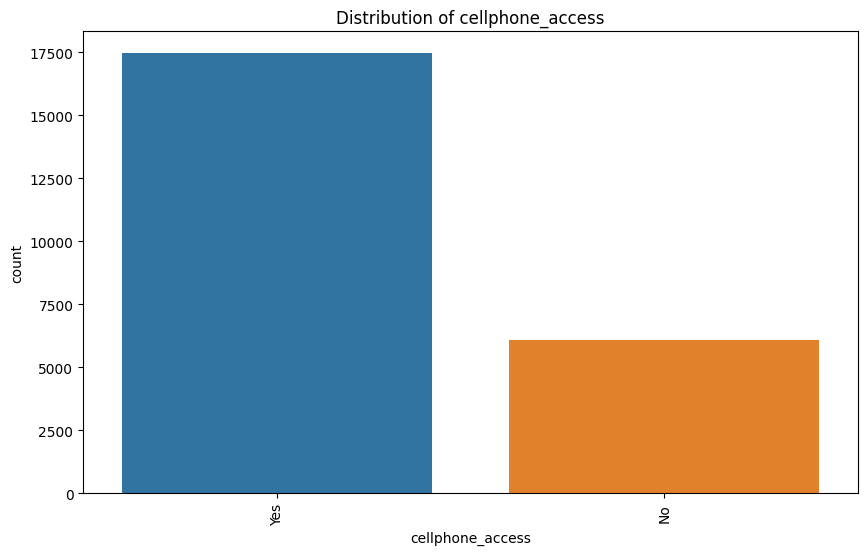

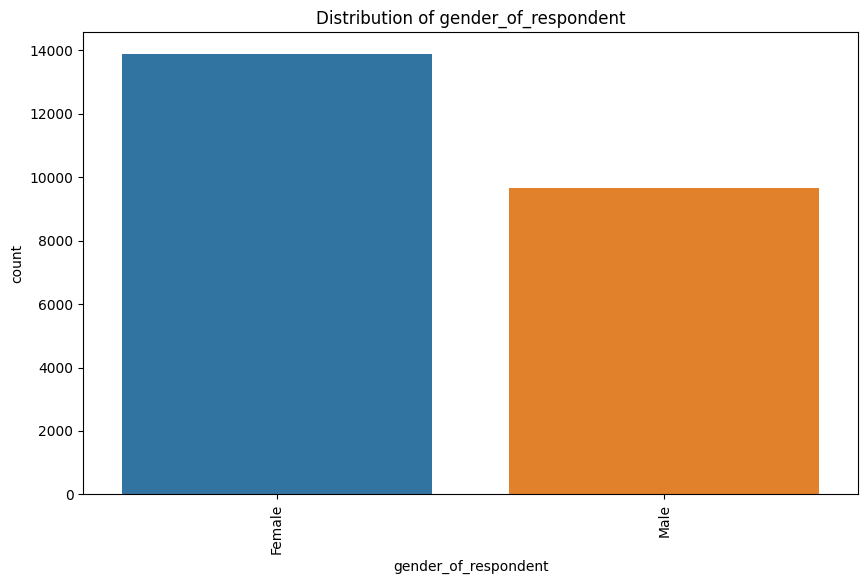

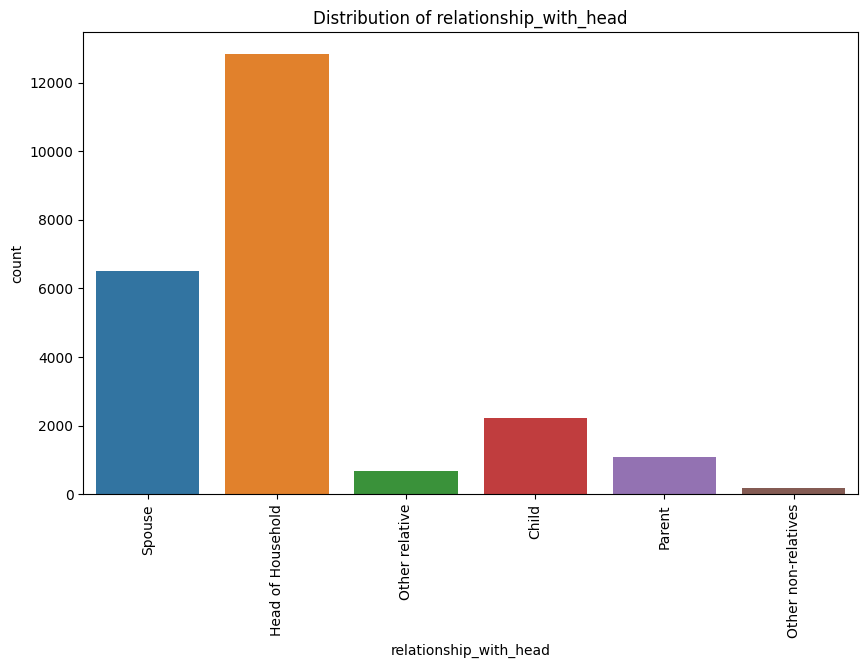

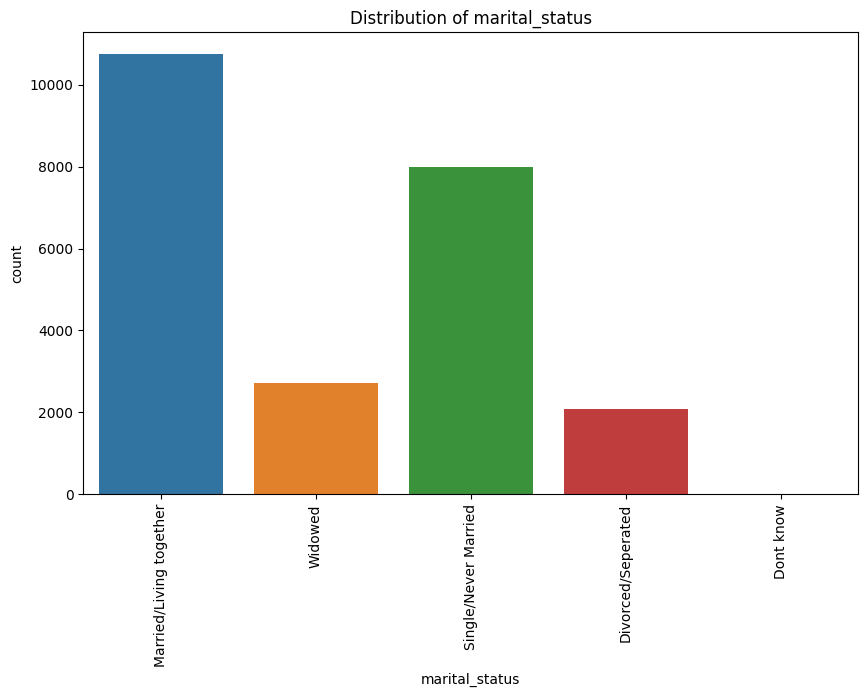

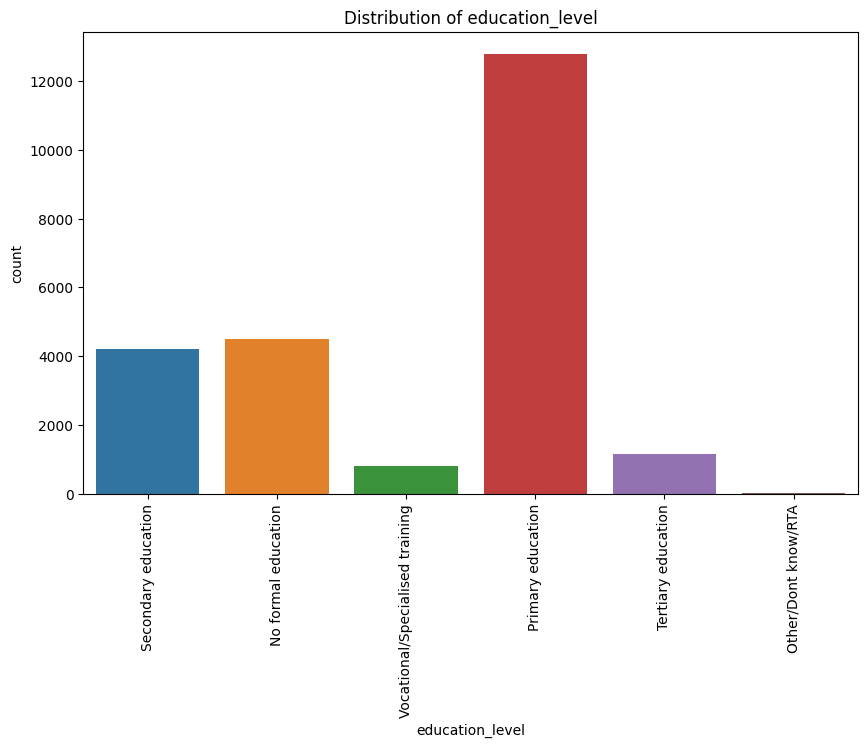

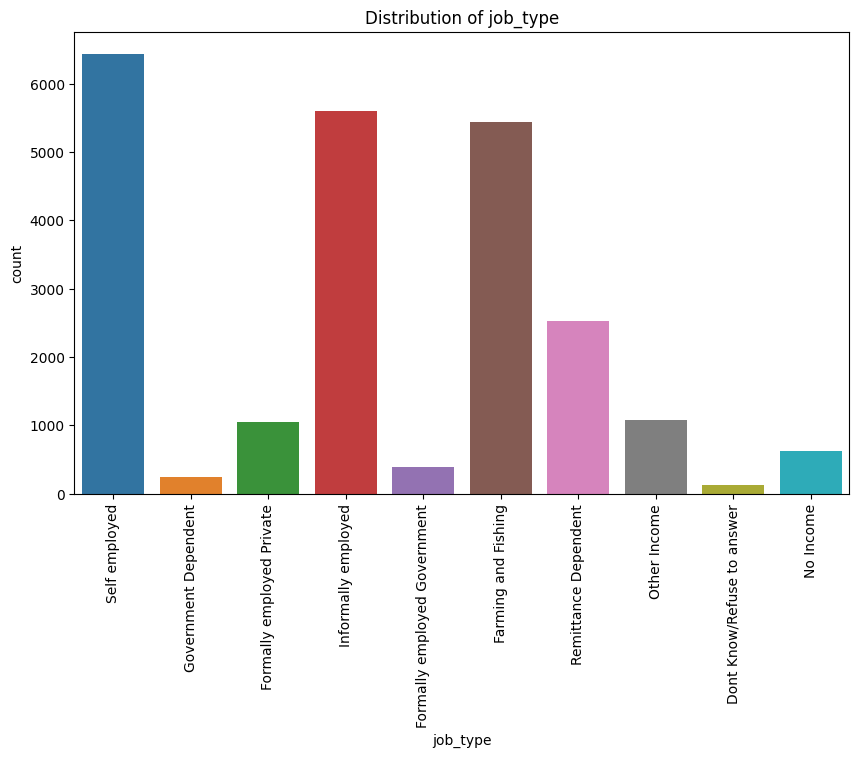

In [114]:
# overview of categorical feature distributions
for column in ['country', 'year', 'location_type', 'cellphone_access', 'gender_of_respondent',
               'relationship_with_head', 'marital_status', 'education_level', 'job_type']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

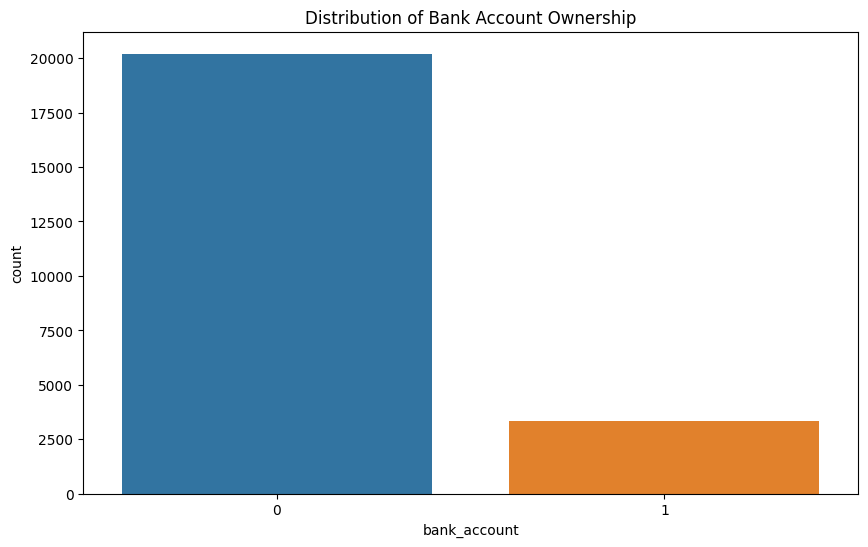

In [115]:
# Target Variable Analysis - Bank account 1/0 for yes/no
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bank_account')
plt.title('Distribution of Bank Account Ownership')
plt.show()

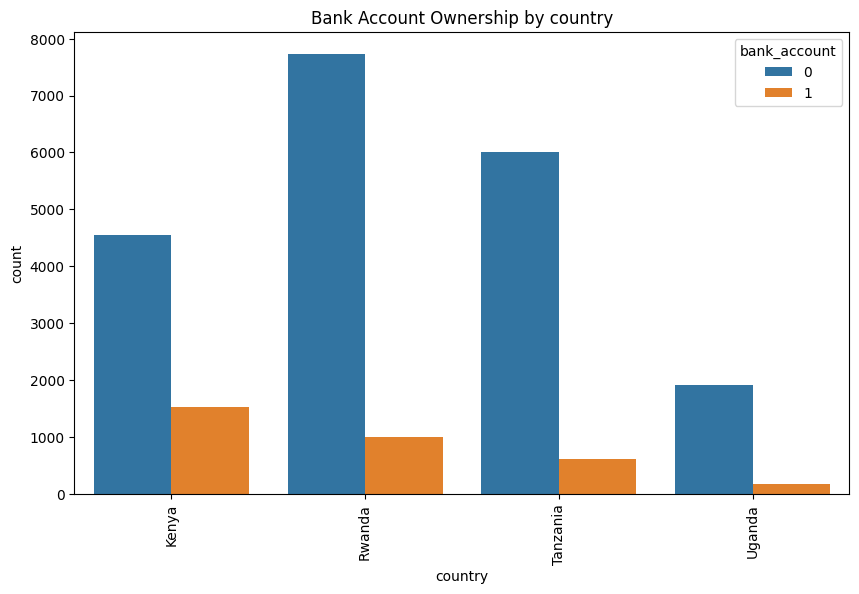

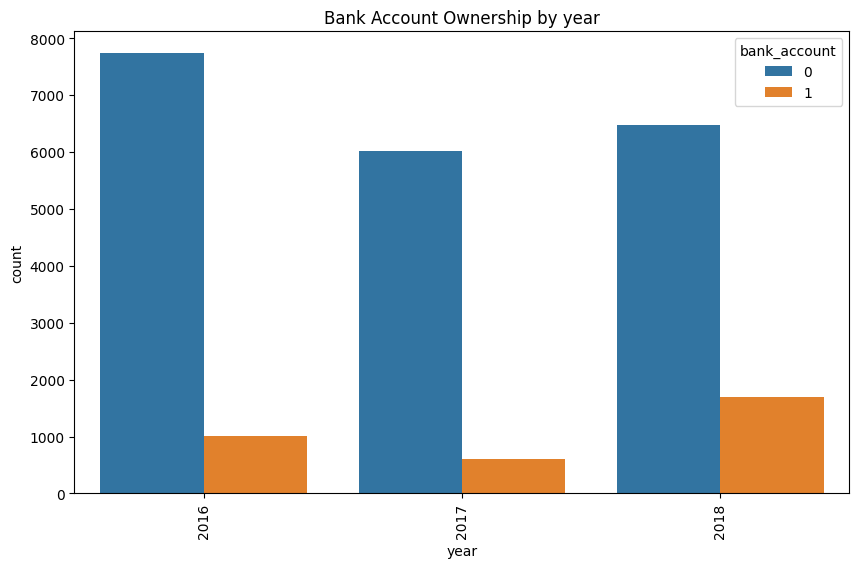

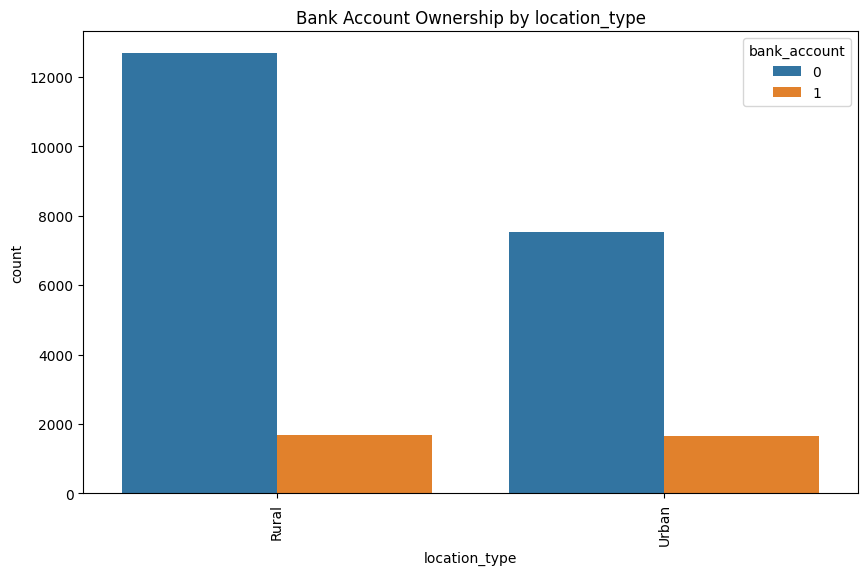

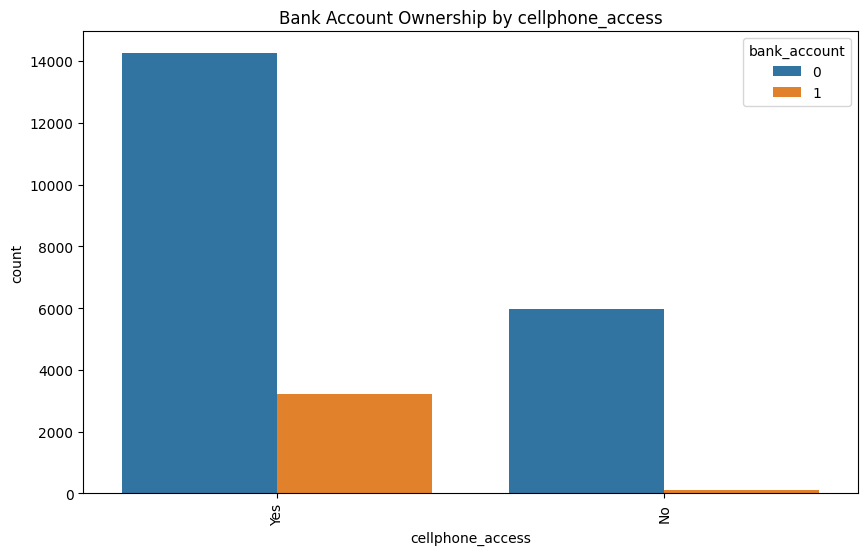

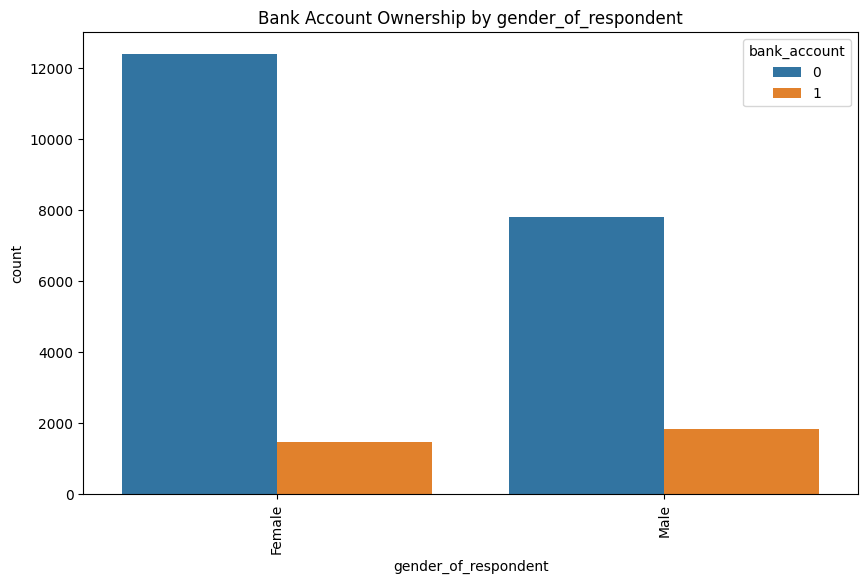

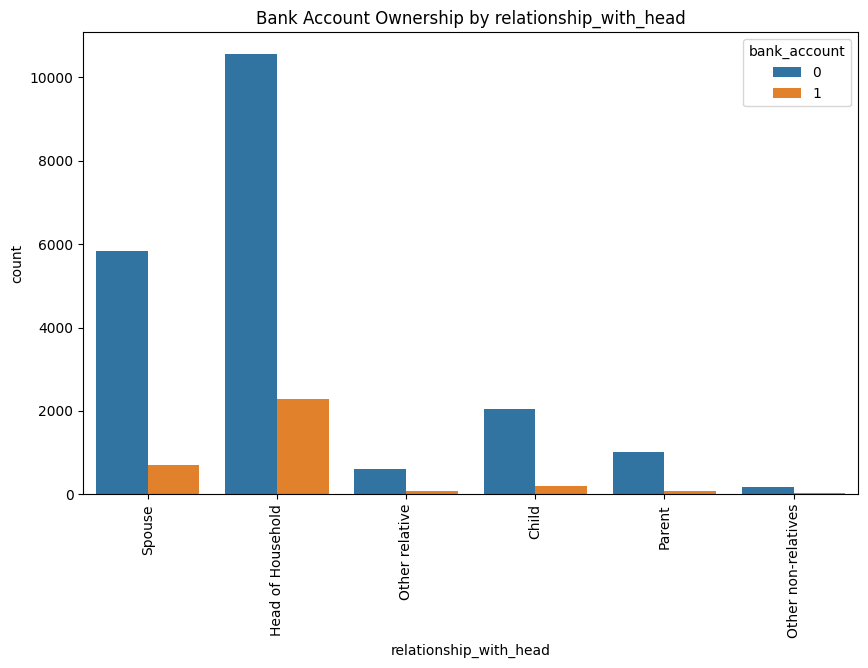

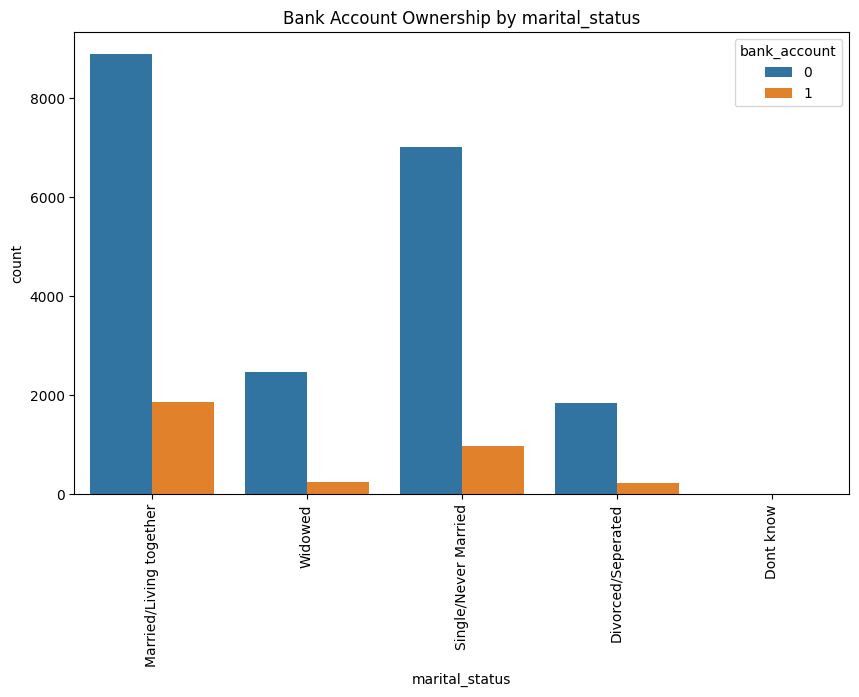

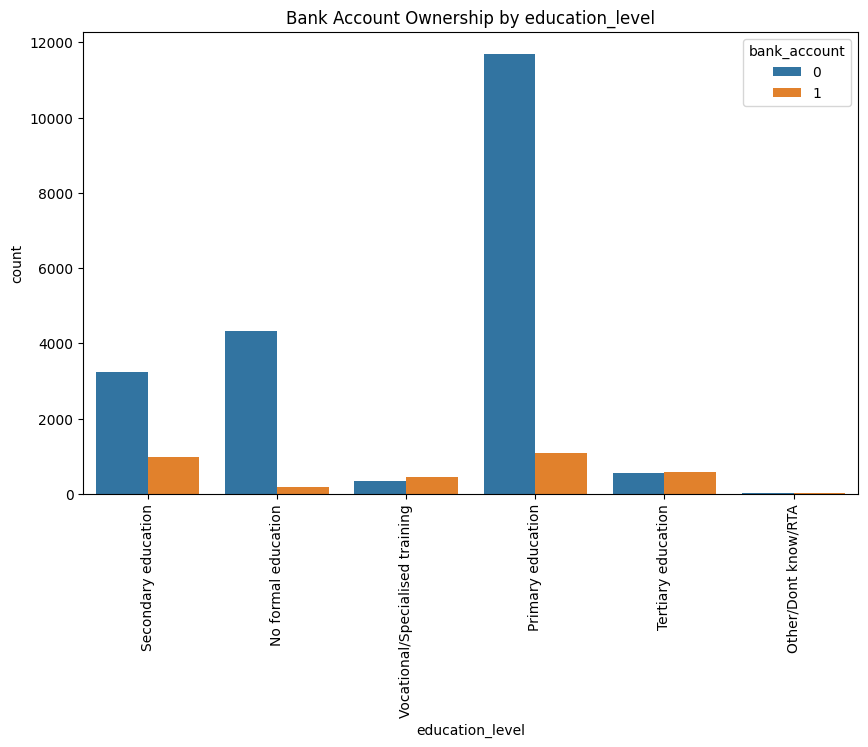

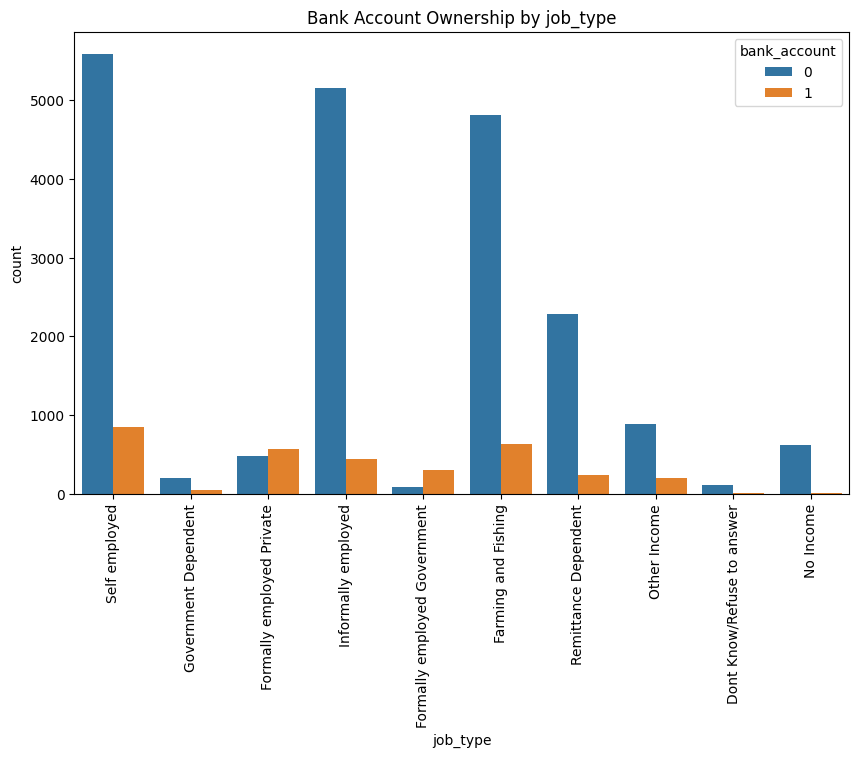

In [116]:
# Feature Relationships with Target Variable
for column in ['country', 'year', 'location_type', 'cellphone_access', 'gender_of_respondent',
               'relationship_with_head', 'marital_status', 'education_level', 'job_type']:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, hue='bank_account')
    plt.title(f'Bank Account Ownership by {column}')
    plt.xticks(rotation=90)
    plt.show()

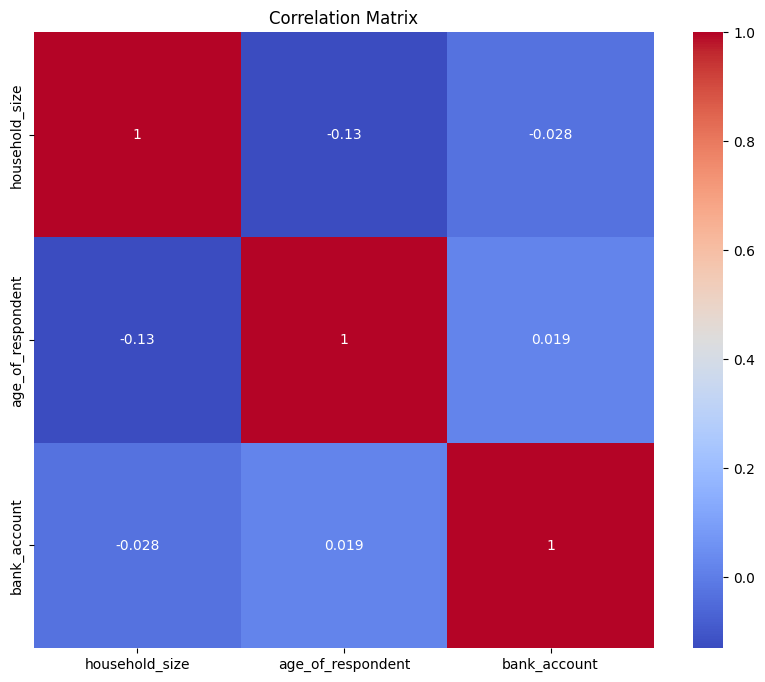

In [117]:
# correlation matrix for numerical features 
numerical_features = ['household_size', 'age_of_respondent', 'bank_account']
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

No feature seems to have collinearity. Now trying to encode categorical features.

In [118]:
categorical_features = ['country', 'year', 'location_type', 'cellphone_access',
                        'gender_of_respondent', 'relationship_with_head', 'marital_status',
                        'education_level', 'job_type']

In [119]:
# one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)


# reformat column names 
df_encoded.columns = df_encoded.columns.str.lower().str.replace(' ', '_')

In [120]:
df_encoded.head()

,bank_account,household_size,age_of_respondent,global_id,country_rwanda,country_tanzania,country_uganda,year_2017,year_2018,location_type_urban,...,education_level_vocational/specialised_training,job_type_farming_and_fishing,job_type_formally_employed_government,job_type_formally_employed_private,job_type_government_dependent,job_type_informally_employed,job_type_no_income,job_type_other_income,job_type_remittance_dependent,job_type_self_employed
0,1,3,24,1,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
1,0,5,70,2,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,1,5,26,3,False,False,False,False,True,True,...,True,False,False,False,False,False,False,False,False,True
3,0,5,34,4,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,0,8,26,5,False,False,False,False,True,True,...,False,False,False,False,False,True,False,False,False,False


In [121]:
df_encoded.shape

(23524, 35)

In [122]:
# compute correlation matrix
correlation_matrix_enc = df_encoded.corr()

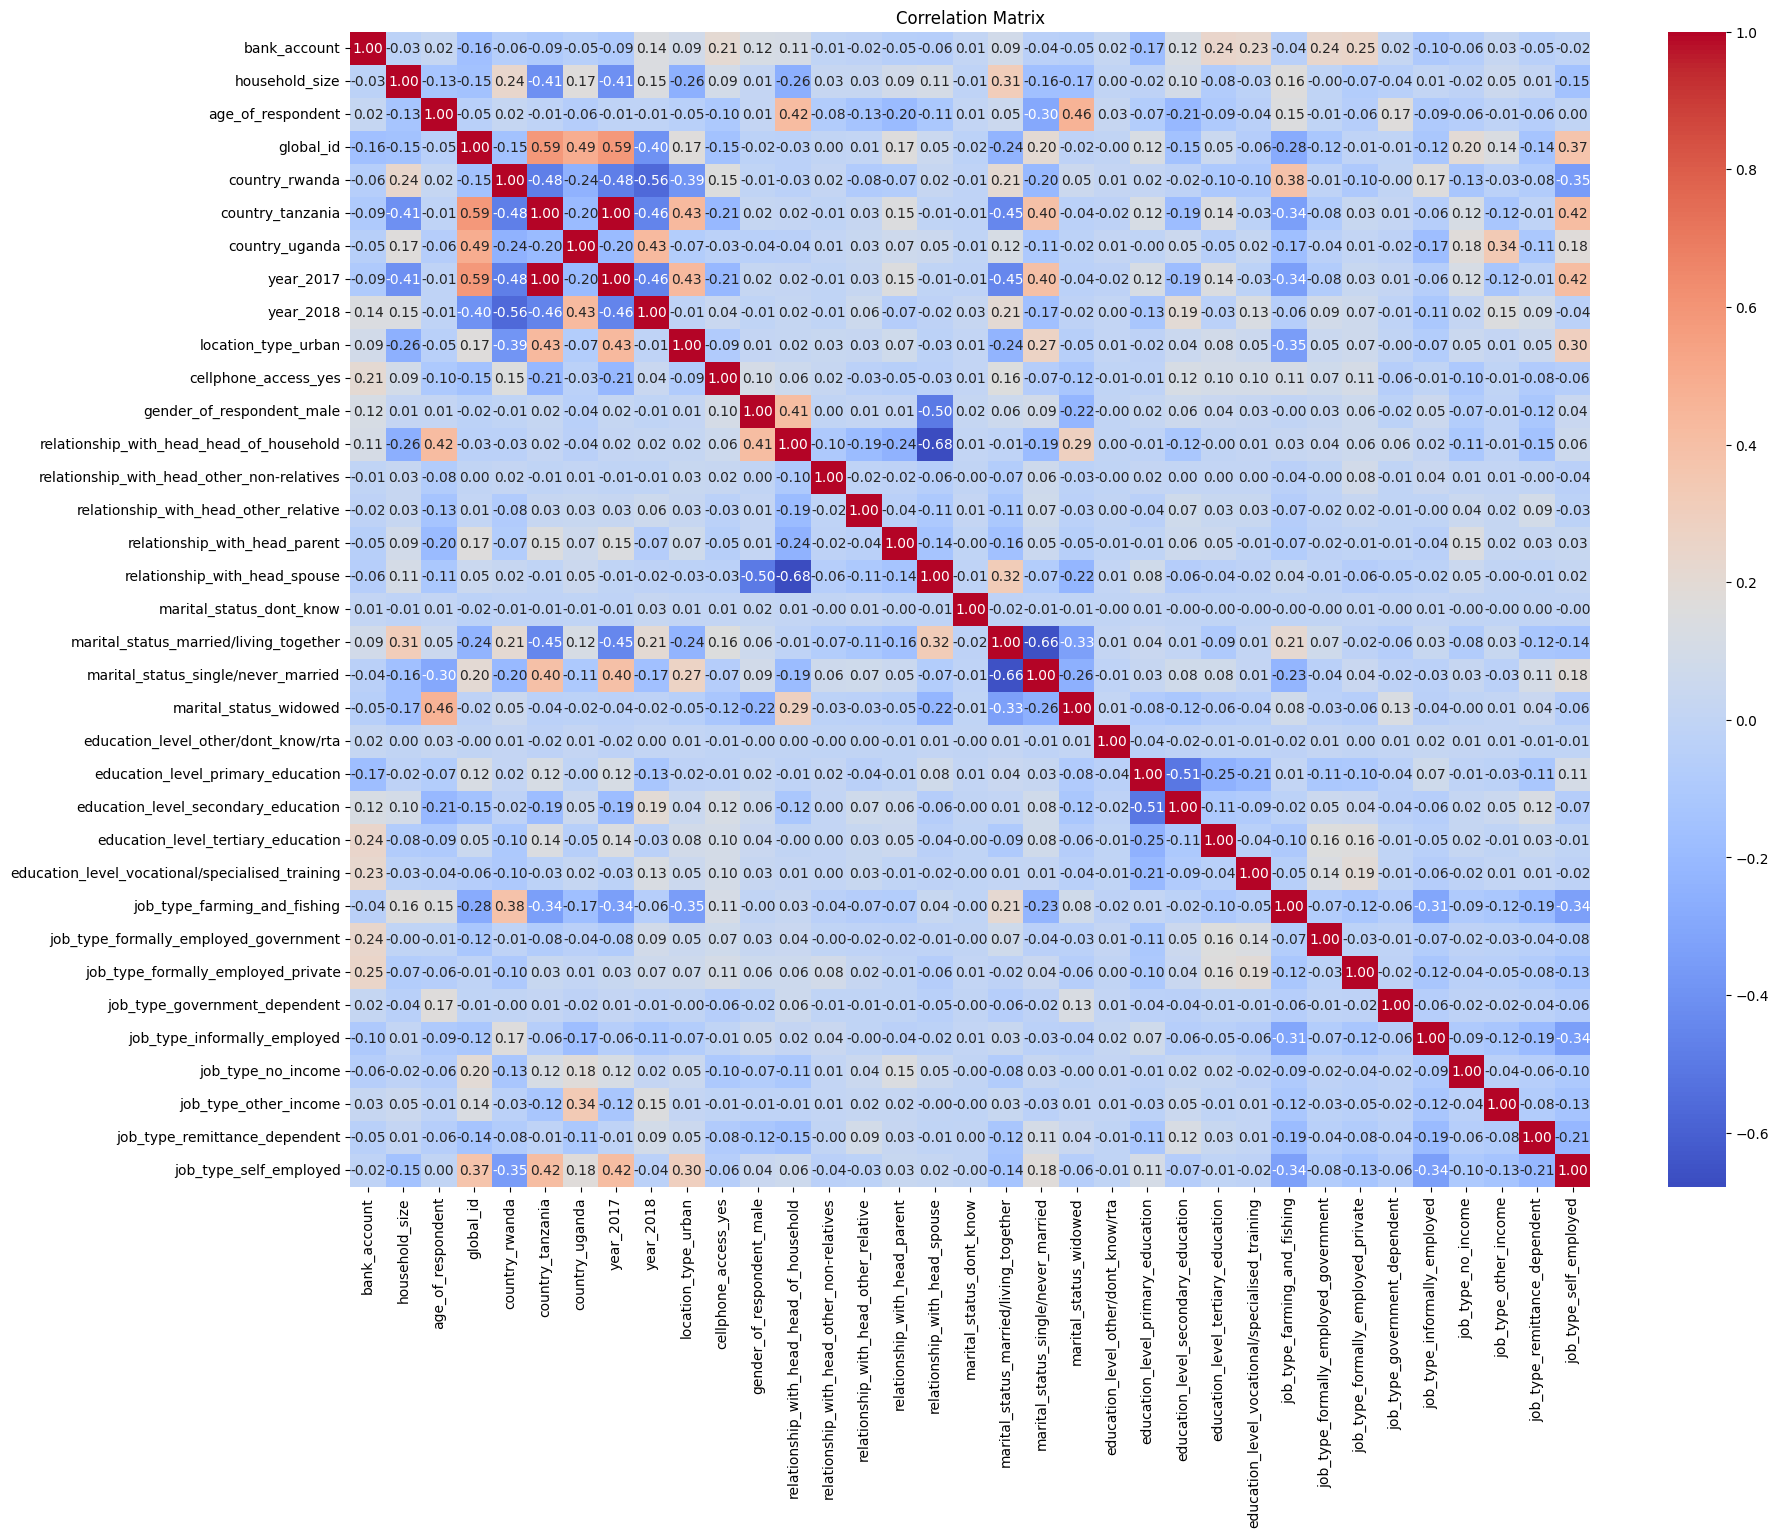

In [123]:
# plot correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix_enc, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Correlation numbers are quite low overall, but here are some features that might be relevant:

* cellphone_access_yes
* education_level_secondary_education
* 